**Этап 1: предобработка текстов**

Я создала функцию для предобработки, которая принимает на вход файл с текстом и язык (язык в данном случае нужен для списка стоп-слов из nltk).

Главное, что нужно сделать на этапе предобработки для любого языка (я беру языки с латинскими алфавитами, поэтому подходы тут везде довольно схожие) -- удалить знаки препинания, привести все слова к нижнему регистру, токенезировать слова. У меня есть предположение, что стоп-слова, возможно, не стоило убирать, т.к. они могли бы стать ярким маркером для каждого из языков, но давайте сначала попробуем без них, так интереснее :) Кроме того, в функции отрезаем первые 7 строчек в каждом файле, т.к. они служебного характера.

Скажу сразу, что у меня два файла с кодом, чтобы не повторять в одном файле код по многу раз. Здесь ради ииследовательского интереса анализируются тексты, предобработка которых включала в себя удаление стоп-слов. Результаты получились не очень впечатляющими (матрица не выдает никакой похожести, частотные списки слабо пересекаются). Но ради интереса можно посмотреть. Основные результаты все-таки в файле, помеченном "with stop words". 

In [1]:
import os
import re
from pprint import pprint
from collections import Counter

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
import string
def good_text(fn, lang):
    with open("C:\\Users\\Ksenia\\Documents\\GitHub\\kssamoylenko\\kompling\\langdetect_b_hw\\udhr\\{0}".format(fn), encoding="utf-8") as f:
        lines = f.readlines()
        clean_lines = " ".join([re.sub('[W\d_-]+', ' ', line.lower().strip()) for line in lines][7:])
        clean_lines = clean_lines.translate(str.maketrans('', '', string.punctuation))
        words = re.split(' +', clean_lines)
        filtered_words = [word for word in words if word not in stopwords.words(lang)]
        return " ".join(filtered_words)

In [8]:
#print(good_text('udhr_ita.txt', 'italian'))

In [9]:
good_ita = good_text('udhr_ita.txt', 'italian')

Теперь создаем списки наиболее частотных слов и n-граммы:

In [10]:
from collections import Counter
from pprint import pprint

In [11]:
def kj(data, count):
    if (type(data) == str):
        data = re.split(' +', data)
    return sorted(Counter(data).items(), key=lambda item: -item[1])[:count]

Вот здесь получаем очень интересный результат: сначала я сделала функцию без стоп-слов, и в списке наиболее частотных превалировали всевозможные предлги и артикли. После очистки здесь оказались вполне "живые" слова, но в топ-300 в итоге попали даже те, которые встречаются только 1 раз, что, по все видимости, не очень хорошо.

In [12]:
kj(good_ita, 300)

[('diritto', 40),
 ('ogni', 39),
 ('individuo', 37),
 ('articolo', 30),
 ('diritti', 23),
 ('essere', 23),
 ('libertà', 21),
 ('nazioni', 11),
 ('dichiarazione', 10),
 ('umani', 10),
 ('potrà', 9),
 ('deve', 9),
 ('unite', 8),
 ('stato', 8),
 ('nessun', 8),
 ('considerato', 7),
 ('internazionale', 6),
 ('famiglia', 6),
 ('sociale', 6),
 ('proprio', 6),
 ('universale', 5),
 ('dignità', 5),
 ('fondamentali', 5),
 ('vita', 5),
 ('rispetto', 5),
 ('presente', 5),
 ('società', 5),
 ('altri', 5),
 ('senza', 5),
 ('religione', 5),
 ('paese', 5),
 ('qualsiasi', 5),
 ('legge', 5),
 ('eguale', 5),
 ('listruzione', 5),
 ('generale', 4),
 ('soltanto', 4),
 ('riconoscimento', 4),
 ('umana', 4),
 ('promuovere', 4),
 ('sviluppo', 4),
 ('persona', 4),
 ('comune', 4),
 ('tutte', 4),
 ('alcuna', 4),
 ('sottoposto', 4),
 ('personalità', 4),
 ('discriminazione', 4),
 ('cittadinanza', 4),
 ('matrimonio', 4),
 ('attraverso', 4),
 ('lavoro', 4),
 ('protezione', 4),
 ('lassemblea', 3),
 ('testo', 3),
 ('fine'

In [13]:
def ngram(str, n):
    s = str.split()
    ngrams = [" ".join(s[i:i+n]) for i in range (len(s)-n+1)]
    return kj(Counter(ngrams), 150)

In [14]:
ita_ngrm = ngram(good_ita, 2)
#print(ita_ngrm)

In [15]:
ita_str = '\n'.join(["{0}".format(s[0]) for s in ita_ngrm])
print(ita_str)

ogni individuo
individuo diritto
articolo ogni
nazioni unite
diritti umani
potrà essere
diritti libertà
nessun individuo
deve essere
individuo potrà
presente dichiarazione
universale diritti
articolo nessun
diritto libertà
dichiarazione universale
rispetto diritti
essere sottoposto
essere arbitrariamente
diritto essere
proprio paese
sviluppo personalità
lassemblea generale
lingue ufficiali
ogni mezzo
esseri umani
credo libertà
considerato indispensabile
tenore vita
stati membri
umani libertà
libertà fondamentali
tutte nazioni
riconoscimento rispetto
legge diritto
senza alcuna
eguale tutela
diritto eguale
secondo diritto
ogni stato
fini principi
principi nazioni
unite articolo
arbitrariamente privato
libero pieno
società diritto
può essere
diritto sicurezza
protezione sociale
listruzione deve
pieno sviluppo
dicembre lassemblea
generale nazioni
unite approvò
approvò proclamò
proclamò dichiarazione
umani testo
testo completo
completo stampato
stampato pagine
pagine seguenti
seguenti dopo


In [16]:
with open('ita_pop.txt', 'w', encoding="utf-8") as file:
    file.write(ita_str)

 А теперь для других языков. Возьмем, например, французский, испанский, английский, немецкий, датский и румынский - алфавиты у всех латинские, поэтому правила предобработки не меняются, хотя есть отличия в диакритических знаках и т.д. Чтобы не занимать места, все способы распечатать списки закомментированы.
Применяем функцию предобработки и собираем н-граммы.
(я понимаю, что логично было бы написать функцию, которая делает все эти 4 шага сразу, но решила пока так не делать, чтобы мы могли проверить результаты на каждом этапе)

In [17]:
good_fra = good_text('udhr_fra.txt', 'french')

In [18]:
fra_ngrm = ngram(good_fra, 2)
#print(fra_ngrm)

In [19]:
fra_str = '\n'.join(["{0}".format(s[0]) for s in fra_ngrm])
#print(fra_str)

In [20]:
with open('fra_pop.txt', 'w', encoding="utf-8") as file:
    file.write(fra_str)

In [21]:
good_spa = good_text('udhr_spa.txt', 'spanish')

In [22]:
spa_ngrm = ngram(good_spa, 2)
#print(spa_ngrm)

In [23]:
spa_str = '\n'.join(["{0}".format(s[0]) for s in spa_ngrm])
#print(spa_str)

In [24]:
with open('spa_pop.txt', 'w', encoding="utf-8") as file:
    file.write(spa_str)

In [25]:
good_eng = good_text('udhr_eng.txt', 'english')
eng_ngrm = ngram(good_eng, 2)
eng_str = '\n'.join(["{0}".format(s[0]) for s in eng_ngrm])
#print(eng_str)

In [26]:
with open('eng_pop.txt', 'w', encoding="utf-8") as file:
    file.write(eng_str)

In [27]:
good_deu = good_text('udhr_deu_1996.txt', 'german')
deu_ngrm = ngram(good_deu, 2)
deu_str = '\n'.join(["{0}".format(s[0]) for s in deu_ngrm])
#print(deu_str)

In [28]:
with open('deu_pop.txt', 'w', encoding="utf-8") as file:
    file.write(deu_str)

In [29]:
good_dan = good_text('udhr_dan.txt', 'danish')
dan_ngrm = ngram(good_dan, 2)
dan_str = '\n'.join(["{0}".format(s[0]) for s in dan_ngrm])
#print(dan_str)

In [30]:
with open('dan_pop.txt', 'w', encoding="utf-8") as file:
    file.write(dan_str)

In [31]:
good_rmn = good_text('udhr_rmn.txt', 'romanian')
rmn_ngrm = ngram(good_rmn, 2)
rmn_str = '\n'.join(["{0}".format(s[0]) for s in rmn_ngrm])
#print(rmn_str)

In [32]:
with open('rmn_pop.txt', 'w', encoding="utf-8") as file:
    file.write(rmn_str)

Итак, мы записали файлы с наиболее частотными биграммами.
Проверим теперь пересечения для разных языков. Перебираем не все языки, а те, где мы ожидаем увидеть пересечения.

In [33]:
set_spa = set(spa_ngrm)
set_ita = set(ita_ngrm)
set_deu = set(deu_ngrm)
set_fra = set(fra_ngrm)
set_eng = set(eng_ngrm)
set_rmn = set(rmn_ngrm)
set_dan = set(dan_ngrm)

In [34]:
print(len(set_ita & set_spa))
print(len(set_ita & set_fra))
print(len(set_ita & set_rmn))
print(len(set_spa & set_fra))
print(len(set_eng & set_fra))
print(set_eng & set_fra)
print(len(set_eng & set_deu))
print(len(set_eng & set_dan))
print(len(set_dan & set_deu))

0
0
0
0
1
{('national international', 2)}
0
0
0


Результаты не очень впечатляющие: пересечения обнаружились только для английского и французского языка. Предполагаю, что для неочищенных слов результат будет немного лучше.  
Посмотрим, будут ли более эффективными пересечения для слов-одиночек:

In [35]:
set_lnl_spa = set(kj(good_spa, 300))
set_lnl_ita = set(kj(good_ita, 300))
set_lnl_deu = set(kj(good_deu, 300))
set_lnl_fra = set(kj(good_fra, 300))
set_lnl_eng = set(kj(good_eng, 300))
set_lnl_rmn = set(kj(good_rmn, 300))
set_lnl_dan = set(kj(good_dan, 300))

In [36]:
print(len(set_lnl_ita & set_lnl_spa))
print(set_lnl_ita & set_lnl_spa)
print(len(set_lnl_ita & set_lnl_fra))
print(set_lnl_ita & set_lnl_fra)
print(len(set_lnl_ita & set_lnl_rmn))
print(len(set_lnl_spa & set_lnl_fra))
print(set_lnl_spa & set_lnl_fra)
print(len(set_lnl_eng & set_lnl_fra))
print(set_lnl_eng & set_lnl_fra)
print(len(set_lnl_eng & set_lnl_spa))
print(set_lnl_eng & set_lnl_spa)
print(len(set_lnl_eng & set_lnl_ita))
print(set_lnl_eng & set_lnl_ita)
print(len(set_lnl_eng & set_lnl_deu))
print(len(set_lnl_eng & set_lnl_dan))
print(len(set_lnl_dan & set_lnl_deu))
print(set_lnl_dan & set_lnl_deu)

7
{('barbarie', 1), ('arbitrariamente', 3), ('fiduciaria', 1), ('tal', 1), ('proclama', 1), ('base', 2), ('momento', 2)}
1
{('barbarie', 1)}
0
2
{('barbarie', 1), ('tribunal', 1)}
16
{('religion', 5), ('justice', 1), ('nations', 8), ('conscience', 3), ('respect', 4), ('impartial', 1), ('obligations', 1), ('race', 2), ('servitude', 1), ('aspiration', 1), ('relations', 1), ('importance', 1), ('constitution', 1), ('tribunal', 1), ('article', 30), ('torture', 1)}
1
{('tribunal', 1)}
1
{('progressive', 1)}
0
0
1
{('artikel', 30)}


Наибольшее число пересечений -- между испанским и итальянским и английским и французским. В целом -- уже лучше. 

Итак, мы создали файлы для наиболее частотных сочетаний для семи языков. Далее нам нужно построить матрицу их схожести и визуализировать ее.

In [4]:
start_path ='C:\\Users\\Ksenia\\Documents\\GitHub\\kssamoylenko\\kompling\\langdetect_b_hw\\lang'

In [38]:
texts = []
for path, dirs, files in os.walk(start_path):
    for fname in files[:10]:
        if not fname.startswith('.'):   
            with open(os.path.join(path, fname), encoding='cp1251') as f:
                raw_text = f.read()
                text = '\n'.join([line for line in raw_text.split('\n') if ':' not in line and line.strip()])
                texts.append(text)
print(len(texts), 'files.')

7 files.


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.spatial.distance import pdist, squareform
import sys
from pprint import pprint

In [40]:
vectorizer = TfidfVectorizer(ngram_range=(2, 2), 
                             min_df=0.1,   
                             max_df=0.9)  
tfidf = vectorizer.fit_transform(texts)
print("tfidf shape:", tfidf.shape)

tfidf shape: (7, 1946)


In [41]:
type(tfidf)

scipy.sparse.csr.csr_matrix

In [42]:
words = vectorizer.get_feature_names() 
print(len(words), 'words')
print(words[:10])

1946 words
['achieve achieve', 'achieve coвђђoperation', 'achtung achtung', 'achtung einhaltung', 'achtung rechten', 'acte dг', 'acte sa', 'actos actos', 'actos barbarie', 'acts acts']


In [43]:
tfidf_ = tfidf.toarray()     
print('tfidf array shape:', tfidf_.shape)
print(type(tfidf_))

tfidf array shape: (7, 1946)
<class 'numpy.ndarray'>


In [44]:
type(tfidf.todense())

numpy.matrixlib.defmatrix.matrix

In [45]:
tfidf = tfidf_

In [46]:
doc = tfidf[-1]      
print(type(doc), doc.shape)
#print(doc)
scores = list(doc)

<class 'numpy.ndarray'> (1946,)


In [47]:
word_scores = list(zip(scores, words))

top = sorted(word_scores, reverse=True)[:20]      # top-20
# pprint(top)
for score, word in top:
    print(word, '{0:.6f}'.format(score))

considerando considerando 0.250174
libertad libertad 0.200139
artг culo 0.200139
naciones unidas 0.150104
derechos humanos 0.150104
considerando esencial 0.150104
seres humanos 0.100069
rг gimen 0.100069
promover promover 0.100069
persona persona 0.100069
nivel vida 0.100069
mundo mundo 0.100069
miembros miembros 0.100069
intrг nseca 0.100069
humana humana 0.100069
hombres mujeres 0.100069
hombre hombre 0.100069
dignidad dignidad 0.100069
derechos libertades 0.100069
derechos hombre 0.100069


Явно произошел сбой при распознавании кодировки: artг culo на самом деле - articulo.  

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(tfidf)
print(similarities.shape)
print(similarities)

(7, 7)
[[ 1.          0.00150531  0.          0.          0.          0.          0.        ]
 [ 0.00150531  1.          0.00161151  0.          0.          0.
   0.00159184]
 [ 0.          0.00161151  1.          0.00183266  0.          0.
   0.00349262]
 [ 0.          0.          0.00183266  1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.
   0.00362215]
 [ 0.          0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.00159184  0.00349262  0.          0.00362215  0.          1.        ]]


In [49]:
cosine_similarity(tfidf[0:3,:])

array([[ 1.        ,  0.00150531,  0.        ],
       [ 0.00150531,  1.        ,  0.00161151],
       [ 0.        ,  0.00161151,  1.        ]])

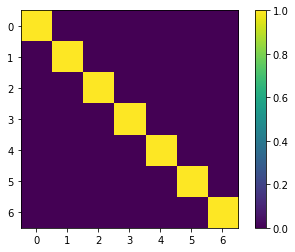

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(similarities[:100, :100])
plt.colorbar()
plt.show()

Пересечений как-то совсем не видно :(